In [1]:
import pandas as pd
data = pd.read_csv("/content/cleaned_data.csv")
data.head()

,lemmatized,Annotation 1,Annotation 2
0,paper describes generic framework generating c...,Theory Proposal,Theory Proposal
1,present simple unsupervised robust accurate sy...,New Algorithm/ Method,New Algorithm/ Method
2,present largescale indepth computational reada...,Resources,Resources
3,worked annotated corpus human tutoring session...,New Algorithm/ Method,New Algorithm/ Method
4,discus one aspect essaywriting namely style pr...,Theory Proposal,Theory Proposal


New Algorithm/ Method            840
Theory Proposal                  739
Model Proposal                   424
Performance Evaluation           373
Model Optimization               217
Dataset Creation                 214
Algorithm/Method Optimization    144
Applications                      77
Resources                         76
Name: Annotation 1, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


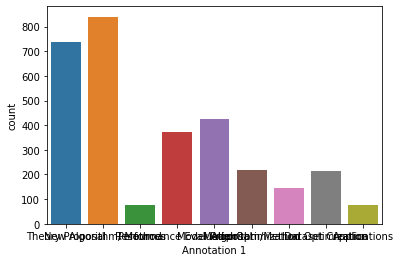

In [2]:
import seaborn as sns
print(data['Annotation 1'].value_counts())
sns.countplot(data['Annotation 1'])

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidfvector = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
Tfidfvector.fit(data['lemmatized'])
x_values = Tfidfvector.transform(data['lemmatized'])
encoder = LabelEncoder()
y_values = encoder.fit_transform(data['Annotation 1'])

In [20]:
from sklearn import model_selection
X_train, x_test, y_train, y_test = model_selection.train_test_split(x_values, y_values, test_size=0.33)

In [21]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
nb = naive_bayes.MultinomialNB()
nb.fit(X_train, y_train)
predicted_nb = nb.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test, predicted_nb) * 100
f1 = f1_score(y_test, predicted_nb, average='macro') *100
precision = precision_score(y_test, predicted_nb, average='macro') *100
recall = recall_score (y_test, predicted_nb, average='macro') *100
print('F1-score:', f1)
print('accuracy score:', accuracy)
print('precision score:', precision)
print('recall score:', recall)

F1-score: 17.480350068540393
accuracy score: 37.46341463414634
precision score: 27.212048481484956
recall score: 18.62571525822892


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
df = pd.DataFrame(list(zip(predicted_nb, y_test)), columns=['Predicted', 'Actual'])
df

,Predicted,Actual
0,5,5
1,8,8
2,8,8
3,5,8
4,5,0
...,...,...
1020,6,4
1021,5,4
1022,6,0
1023,5,5
